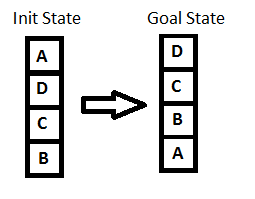

In [39]:
from IPython.display import Image
Image(filename="init_goal.png")

In [147]:
def show(state): # lista stekova
    counter = 0
    for stack in state:
        print("Stack ", counter, "blocks: ", end = " ")
        counter += 1
        for block in stack:
            print(block, end=" ")
        print(" ")
    print("\n")

def state_heuristics(state): 
    h = 0
    for stack in state:
        h += stack_heuristics(stack)
    return h

def stack_heuristics(stack):
    stack_heuristics = 0
    is_pos_correct = True
    goal_start_ind = 0
    for block in stack:
        if is_pos_correct and (goal_stack[goal_start_ind] == block):
            stack_heuristics += goal_start_ind
        else:
            stack_heuristics -= goal_start_ind
            is_pos_correct = False
        goal_start_ind += 1
    
    return stack_heuristics

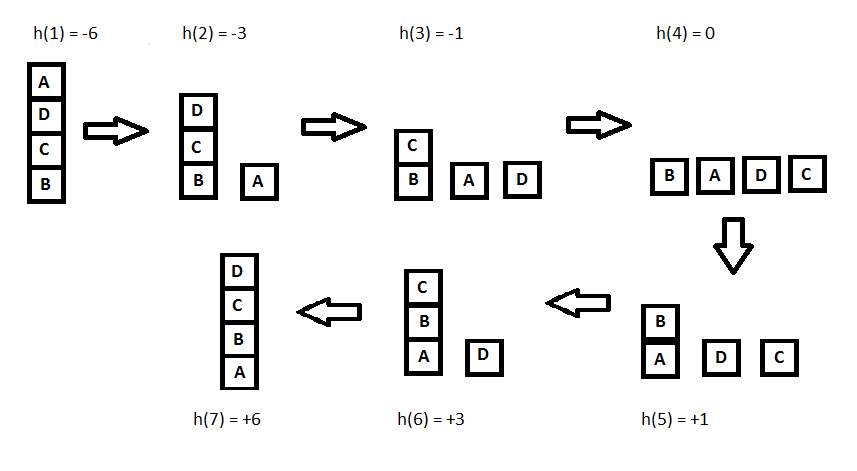

In [41]:
Image(filename="state_iterations.png")

In [36]:
import copy

def gen_neighbors(state):
    neighbors = []
    # prvo sva moguća spuštanja u nove stekove
    for i in range(len(state)):
        if len(state[i]) > 1:
            neighbors.append(push_to_new(state, i))
    # onda sva moguća premeštanja sa jednog na drugi
    for i in range(len(state)):
        for j in range(len(state)):
            if i != j:
                neighbors.append(push_to_exis(state, i, j))
                
    return neighbors

def push_to_new(state, stack_index):
    new_state = copy.deepcopy(state) # hardcopy
    new_stack = []
    block = new_state[stack_index].pop()
    new_stack.append(block)
    new_state.append(new_stack)
    return remove_empty(new_state)

def push_to_exis(state, source_index, dest_index):
    new_state = copy.deepcopy(state)
    block = new_state[source_index].pop()
    new_state[dest_index].append(block)
    return remove_empty(new_state)

def remove_empty(state):
    for stack in state:
        if len(stack) == 0:
            state.remove(stack)
    return state


In [143]:
def hillclimb(x, f, neighbors, steps=10000, debugging=False):
    fx = f(x)
    neighborhood = iter(neighbors(x))
    for i in range(steps):
        x2 = next(neighborhood)
        fx2 = f(x2)
        if fx2 > fx:
            x, fx = x2, fx2
            neighborhood = iter(neighbors(x))
    if debugging:
        print("hillclimb:", x, int(fx))
    return x 

def hillclimb2(x, f, neighbors, steps=100, debugging=False):
    fx = f(x)
    neighborhood = neighbors(x)
    ind = 0;
    for i in range(steps):
        if ind == len(neighborhood): return None # fail
        x2 = neighborhood[ind]
        fx2 = f(x2)
        ind += 1
        if fx2 > fx:
            x, fx = x2, fx2
            if(debugging): show(x)
            if x[0] == goal_stack: return x # kraj algoritma, dostignuto ciljno stanje blokova (na poziciji 0 zbog remove_empty)
            neighborhood = neighbors(x)
            ind = 0

In [149]:
start = [["B", "C", "D", "A"]]
goal_stack = ["A", "B", "C", "D"]

result = hillclimb2(start, state_heuristics, gen_neighbors, debugging=True)


Stack  0 blocks:  B C D  
Stack  1 blocks:  A  


Stack  0 blocks:  B C  
Stack  1 blocks:  A  
Stack  2 blocks:  D  


Stack  0 blocks:  B  
Stack  1 blocks:  A  
Stack  2 blocks:  D  
Stack  3 blocks:  C  


Stack  0 blocks:  A B  
Stack  1 blocks:  D  
Stack  2 blocks:  C  


Stack  0 blocks:  A B C  
Stack  1 blocks:  D  


Stack  0 blocks:  A B C D  


